Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
Требуется выполнить следующее задание:

# Задание Баллы
1. Загрузите файл HR.csv в pandas dataframe 
2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом
департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности): 
*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов 
9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary) Оценить качество модели на тестовой выборки
10. Загрузить jupyter notebook с решение на github и прислать ссылку 5
Итого - максимум 85 баллов
Для зачета необходимо набрать минимум 55

In [76]:
# загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
from scipy import stats
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [77]:
#1 Загрузите файл HR.csv в pandas dataframe
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
id ='1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('HR.csv')  
dt = pd.read_csv('HR.csv')
print(dt.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [78]:
# from pandas.core.describe import describe_categorical_1d
#2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

departments=['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
salarys=['high','low','medium']

def add_category(row):
  for i in range(len(departments)):
    if row['department'] == departments[i]:
      row['department_id']=i
  for i in range(len(salarys)):
    if row['salary'] == salarys[i]:
      row['salary_id']=i
  return row

print(dt.info())
print(dt.groupby('department').count()['number_project'])
print(dt.groupby('salary').count()['number_project'])

print('Все поля заполнены, пропусков нет')
print('Числовыеи поля satisfaction_level,Last_evaluation,number_projects,average_monthly_hours, time_spend_company, \nwork_accident, lef, promotion_last_5years  - по ним будут посчитаны характеристики')
print('Символьные поля: department - 10 значений, salary - 3 значения. \nПри необходимости можно будет перевести в категориальные поля.')
dt1=dt.apply(add_category, axis=1) # dt1 - исходный набор данных с добавленными числовыми полями символьных характеристик

print('\nOсновные статистики:')
statis=dt.describe()
print(statis)

print('\nMожно посчитать вручную:')
print(f"max_satisfaction_level={dt['satisfaction_level'].max()}, min_last_evaluation={dt['last_evaluation'].min()},")
print(f"mode_number_project={dt['number_project'].mode()[0]}, mean_average_montly_hours={dt['average_montly_hours'].mean()}")
print(f"median_time_spend_company={dt['time_spend_company'].median()}, std_Work_accident={dt['Work_accident'].std()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical

                       var1                  var2     value
min_cor  time_spend_company         Work_accident   0.00212
max_cor      number_project  average_montly_hours  0.417211


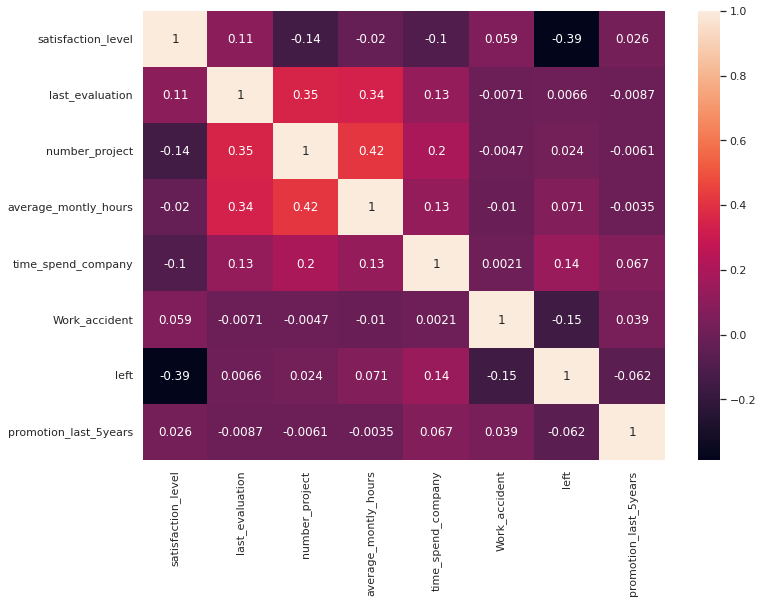

In [79]:
#3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные

dc=dt.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(dc, annot=True)
result=pd.DataFrame(index=['min_cor','max_cor'], columns=['var1','var2','value'])
min_=1
max_=0
for i in range(len(dc.columns)):
  for j in range(len(dc.columns)):
    if i != j and max_<abs(dc[dc.columns[i]][dc.columns[j]]):
      max_=abs(dc[dc.columns[i]][dc.columns[j]])
      result.value.max_cor=dc[dc.columns[i]][dc.columns[j]]
      result.var1.max_cor=dc.columns[i]
      result.var2.max_cor=dc.columns[j]
    if min_>abs(dc[dc.columns[i]][dc.columns[j]]):
      min_=abs(dc[dc.columns[i]][dc.columns[j]])
      result.value.min_cor=dc[dc.columns[i]][dc.columns[j]]
      result.var1.min_cor=dc.columns[i]
      result.var2.min_cor=dc.columns[j]
print(result)

In [80]:
#4 Рассчитайте сколько сотрудников работает в каждом департаменте
print(dt.groupby('department').count()['number_project'])


department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: number_project, dtype: int64


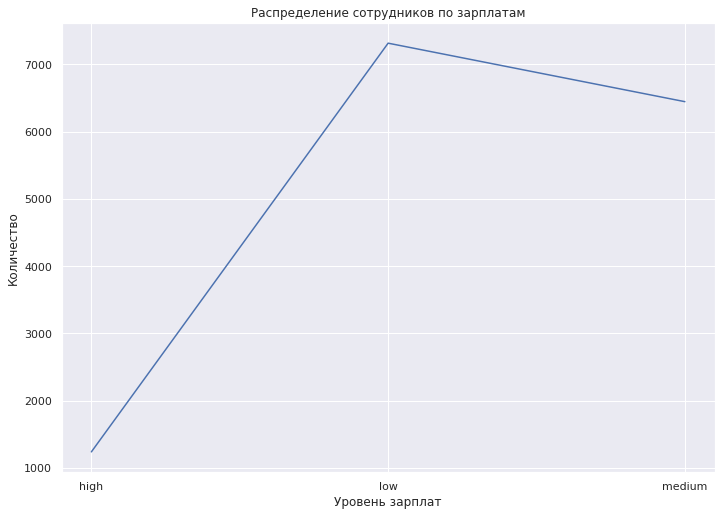

In [81]:
#5 Показать распределение сотрудников по зарплатам.
dt_s=dt[['number_project','salary']].groupby('salary').count() 
plt.plot(dt_s.index, dt_s['number_project'])
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплат')
plt.ylabel('Количество')
plt.show()

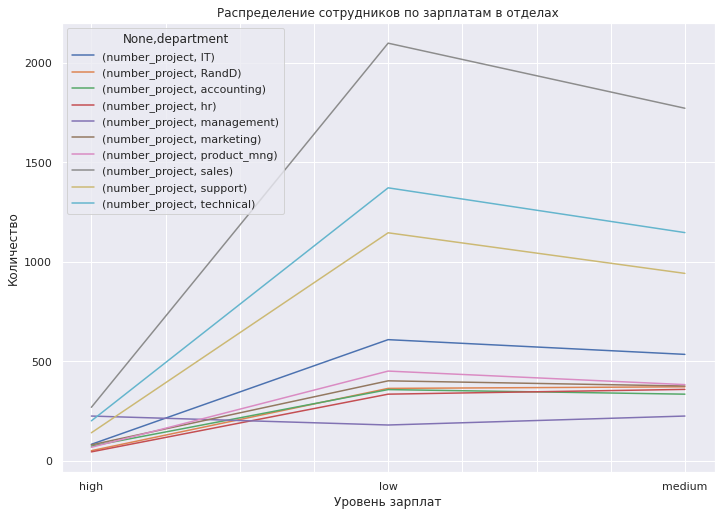

In [82]:
#6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
dt_s=dt[['number_project','salary','department']].groupby(['salary','department']).count().unstack(level=-1) 
dt_s.plot(title='Распределение сотрудников по зарплатам в отделах', 
                             xlabel='Уровень зарплат', 
                             ylabel='Количество')
plt.show()

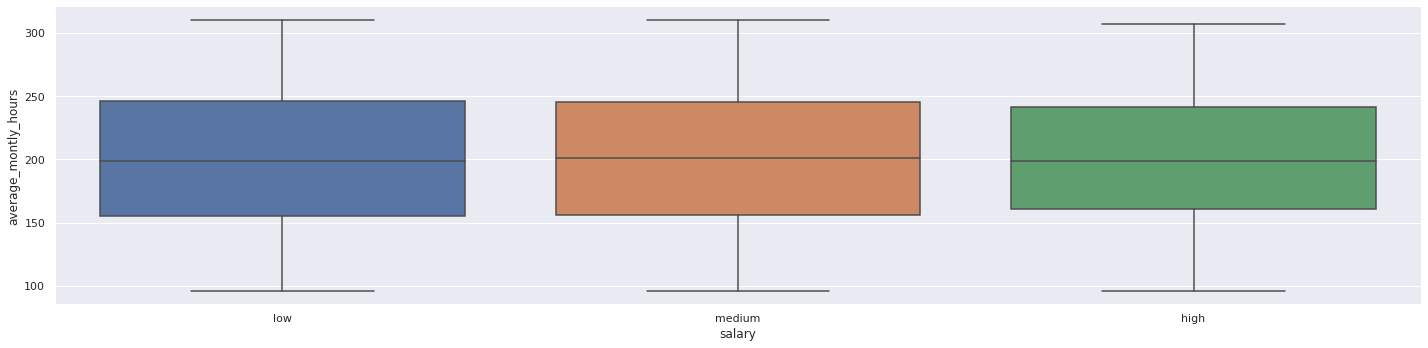

Cотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом?


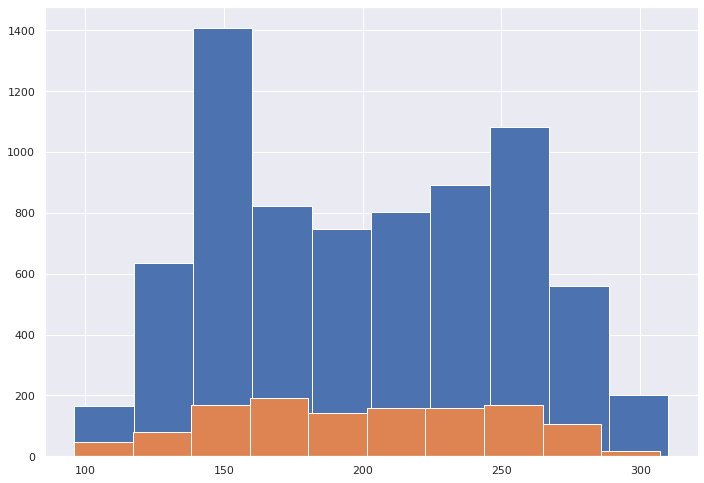

1. H0 - сотрудники с высоким окладом проводят на работе столько же времени, что и сотрудники с низким окладом,
 Н1 - различие между группами статистически значимо
2. уровень значимости = 0.05
len1=1237, len2=7316
 mannwhitneyu test. pval=0.5994281432287059, statistic=4707788.0, significance=0.05
На 0.05 уровене значимости, мы не отвергаем нулевую гипотезу.Результаты не отличаются


In [83]:
#7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
sns.catplot(x="salary", y="average_montly_hours",
            data=dt, kind="box",
            height=5, aspect=4);
plt.show() 
significance=0.05

print('Cотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом?')
plt.hist(dt[dt['salary'] == salarys[1]]['average_montly_hours'], bins=10);  
plt.hist(dt[dt['salary'] == salarys[0]]['average_montly_hours'], bins=10); 

plt.show()

print('1. H0 - сотрудники с высоким окладом проводят на работе столько же времени, что и сотрудники с низким окладом,\n Н1 - различие между группами статистически значимо')
print(f'2. уровень значимости = {significance}')
print(f"len1={dt[dt['salary'] == salarys[0]]['average_montly_hours'].dropna().size}, \
len2={dt[dt['salary'] == salarys[1]]['average_montly_hours'].dropna().size}")
statistic1, pval1 = stats.mannwhitneyu(dt[dt['salary'] == salarys[0]]['average_montly_hours'].dropna(), \
                dt[dt['salary'] != salarys[1]]['average_montly_hours'].dropna() )
print(f" mannwhitneyu test. pval={pval1}, statistic={statistic1}, significance={significance}")
if pval1 < significance:
    print(f"На {significance} уровене значимости, мы отвергаем нулевую гипотезу и принимаем H1.Результаты отличаются")
    if dt[dt['Genre'] == salarys[0]]['average_montly_hours'].mean()>dt[dt['Genre'] != salarys[1]]['average_montly_hours'].mean():
      print(f'Выбираем {salarys[0]} - его среднее значение выше') 
    else:
      print(f'Выбираем {salarys[1]} - его среднее значение выше')
else:
    print(f"На {significance} уровене значимости, мы не отвергаем нулевую гипотезу.Результаты не отличаются")

8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
* Среднее количество проектов


In [84]:
def groupby_function(data):
    return data[data.promotion_last_5years==1].promotion_last_5years.count() / data.promotion_last_5years.count()
print('Доля сотрудников с повышением за последние 5 лет')
print(dt.groupby('left').apply(groupby_function))  

print('Средняя степень удовлетворенности и Среднее количество проектов')
print(dt[['satisfaction_level','number_project', 'left']].groupby(['left']).mean())

Доля сотрудников с повышением за последние 5 лет
left
0    0.026251
1    0.005321
dtype: float64
Средняя степень удовлетворенности и Среднее количество проектов
      satisfaction_level  number_project
left                                    
0               0.666810        3.786664
1               0.440098        3.855503


9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [85]:
# Разделить данные на тестовую и обучающую выборки 
X_train, X_test, y_train, y_test = train_test_split(dt[['satisfaction_level','last_evaluation','number_project','average_montly_hours', 'time_spend_company','Work_accident', 'promotion_last_5years']], dt['left'],test_size=0.30, random_state=42)
# Построить модель LDA
model = LDA()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
y_pred=model.predict(X_test)
# Оценить качество модели на тестовой выборки
print(f"model.score={model.score(X_test, y_test)}")
print(f"confusion_matrix\n{confusion_matrix(y_test, y_pred)}")


model.score=0.7557777777777778
confusion_matrix
[[3138  290]
 [ 809  263]]
